In [1]:
from sklearn.metrics import roc_auc_score, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# import mlprepare as mlp 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import learning_curve,  GridSearchCV, cross_validate, KFold, cross_val_score
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from scipy.stats import spearmanr,kruskal
from imblearn.ensemble import BalancedRandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, auc
from tensorflow.keras import regularizers
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.metrics import AUC
from sklearn.metrics import auc, precision_recall_curve, matthews_corrcoef
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.manifold import TSNE
from umap import UMAP
import plotly.express as px


# nanoRMS prediction evaluation

Evaluate the psU prediction of nanoRMS on our data 

In [12]:
def eval(t,l,yy,w,z):
    print(t)
    auc = roc_auc_score(yy, z)
    acc= accuracy_score(yy, w)
    prc = precision_score(yy, w)
    rec= recall_score(yy, w)
    f1= f1_score(yy, w)
    cm = confusion_matrix(yy, w)
    print(auc)
    print(acc)
    print(prc)
    print(rec)    
    print(f1)
    print(cm)
    print(kruskal(l[w == 1],l[w == 0]))
    return [[t,auc,acc,prc,rec,f1, cm[0,0],cm[1,1],cm[0,1],cm[1,0]]]

def eval2(yy,w):
    cm = confusion_matrix(yy, w)
#     ac = roc_auc_score(yy, z)
    acc = accuracy_score(yy, w)
    prc = precision_score(yy, w)
    rec = recall_score(yy, w)
    f1 = f1_score(yy, w)
#     q,p = kruskal(l[(z>w).astype('int32').flatten() == 1],l[(z>w).astype('int32').flatten() == 0])
#     corr,pv= spearmanr(l, z)
#     precision, recall, _ = precision_recall_curve(yy, z)
#     auc_score = auc(recall, precision)
    matt = matthews_corrcoef(yy, w)
#     print(t)
#     print(ac)
#     print(auc_score)
    print(acc)
    print(prc)
    print(rec)
    print(f1)
    print(cm)
#     print(corr)
#     print(p)
    print(matt)

#     return [[t,meth, w,auc,acc,prc,rec,f1, cm[0,0],cm[1,1],cm[0,1],cm[1,0], p,corr,pv]]
    
def evaluate(y_proba1, y_proba2,y_proba3, thre0, thre1, thre2):

#     eval('Flongle18S',X_flongle_['Level'].astype(float),y_flongle,y1,y_proba1)
#     eval('Flongle28S',X_28flongle_['Level'].astype(float),y_28flongle,y2,y_proba2)
#     eval('MinION28S',X_28MinION_['Level'].astype(float),y_28MinION,y3,y_proba3)

    print('.....0.5.......')
#     tab = eval2('ytest','Default', X_test_['Level'].astype(float),y_test,0.5,y_proba0)
    tab = eval2('Flongle18S','Default', X_flongle_['Level'].astype(float),y_flongle,0.5,y_proba1)
    tab = np.concatenate((tab,eval2('Flongle28S','Default',X_28flongle_['Level'].astype(float),y_28flongle,0.5,y_proba2)), axis =0)
    tab = np.concatenate((tab,eval2('MinION28S','Default',X_28MinION_['Level'].astype(float),y_28MinION,0.5,y_proba3)), axis =0)
    
    print('.....yind.......') 
#     tab = np.concatenate((tab,eval2('ytest','Youden idx',X_test_['Level'].astype(float),y_test,thre0,y_proba0)), axis =0)
    tab = np.concatenate((tab,eval2('Flongle18S','Youden idx',X_flongle_['Level'].astype(float),y_flongle,thre0,y_proba1)), axis =0)
    tab = np.concatenate((tab,eval2('Flongle28S','Youden idx',X_28flongle_['Level'].astype(float),y_28flongle,thre0,y_proba2)), axis =0)
    tab = np.concatenate((tab,eval2('MinION28S','Youden idx',X_28MinION_['Level'].astype(float),y_28MinION,thre0,y_proba3)), axis =0)

    print('.....f1.......')
#     tab = np.concatenate((tab,eval2('ytest','F1',X_test_['Level'].astype(float),y_test,thre2,y_proba0)), axis =0)    
    tab = np.concatenate((tab,eval2('Flongle18S','F1',X_flongle_['Level'].astype(float),y_flongle,thre2,y_proba1)), axis =0)
    tab = np.concatenate((tab,eval2('Flongle28S','F1',X_28flongle_['Level'].astype(float),y_28flongle,thre2,y_proba2)), axis =0)
    tab = np.concatenate((tab,eval2('MinION28S','F1',X_28MinION_['Level'].astype(float),y_28MinION,thre2,y_proba3)), axis =0)
    return tab

def roccurve(y_test,yhat):
    fpr, tpr, thresholds = roc_curve(y_test, yhat)
    # get the best threshold
    J = tpr - fpr
    ix1 = np.argmax(J)
    best_thresh0 = thresholds[ix1]
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix2 = np.argmax(gmeans) 
    best_thresh1 = thresholds[ix2]

    plt.plot(fpr, tpr, marker='.', label='ROC CURVE')
    plt.scatter(fpr[[ix1,ix2]], tpr[[ix1,ix2]], marker='o', color='red', label ='Youden idx')
    plt.scatter(fpr[[ix1,ix2]], tpr[[ix1,ix2]], marker='o', color='gold', label='gmeans idx')

    plt.annotate(round(best_thresh1,4),(fpr[ix1], tpr[ix1]+0.03), size = 8 )
    plt.annotate(round(best_thresh1,4),(fpr[ix2], tpr[ix2]+0.03), size = 8 )



    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    best_thresh2 = thresholds[ix]
    
#     no_skill = len(y_test[y_test==1]) / len(y_test)
#     plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No psU')

    plt.plot(recall, precision, marker='.', label='PR CURVE')
    plt.scatter(recall[ix], precision[ix], marker='o', color='green', label='F1 score')
    plt.annotate(round(best_thresh2,4),(recall[ix], precision[ix]+0.03), size = 8 )



    # axis labels
    plt.xlabel('Recall/False Positive Rate')
    plt.ylabel('Precision/True Positive Rate')
    plt.title('Optimal Threshold')

    plt.legend()
    # show the plot
    plt.show()

    return best_thresh0,best_thresh1, best_thresh2
def prcurve(y_test,yhat):
    precision, recall, thresholds = precision_recall_curve(y_test, yhat)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    best_thresh = thresholds[ix]
    
#     no_skill = len(y_test[y_test==1]) / len(y_test)
#     plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No psU')

    plt.plot(recall, precision, marker='.', label='PR CURVE')
    plt.scatter(recall[ix], precision[ix], marker='o', color='red')
    plt.annotate(round(best_thresh,4),(recall[ix], precision[ix]+0.03), size = 8 )



    # axis labels
    plt.xlabel('Recall/False Positive Rate')
    plt.ylabel('Precision/True Positive Rate')
    plt.title('Optimal Threshold')

    plt.legend()
    # show the plot
    plt.show()
    return best_thresh

def cor(y1,y2,y3, ylabel,w):
    
    flt = X_flongle_['Level'] !=0
    fig1=sns.scatterplot(X_flongle_['Level'].astype(float)[flt], y1.flatten()[flt], hue= X_flongle_['ModStatus'][flt])
    fig1.set(xlabel='Modification level', ylabel=ylabel, title = 'Flongle(18S)')
    plt.show()

    flt = X_28flongle_['Level'] !=0
    fig1=sns.scatterplot(X_28flongle_['Level'].astype(float)[flt], y2.flatten()[flt], hue= X_28flongle_['ModStatus'][flt])
    fig1.set(xlabel='Modification level', ylabel=ylabel, title = 'Flongle(28S)')
    plt.show()

    flt = X_28MinION_['Level'] !=0
    fig1=sns.scatterplot(X_28MinION_['Level'].astype(float)[flt], y3.flatten()[flt], hue= X_28MinION_['ModStatus'][flt])
    fig1.set(xlabel='Modification level', ylabel=ylabel, title = 'MinION(28S)')
    plt.show()
    
     
    
#     plt.boxplot([X_flongle_['Level'].astype(float)[(y1>w).astype('int32').flatten() == 0], X_flongle_['Level'].astype(float)[(y1>w).astype('int32').flatten() == 1]])
#     plt.xlabel('Classes')
#     plt.ylabel('Modification level')
#     plt.title('Features without neighbors (Flongle(18S))')

#     plt.show()
    
#     plt.boxplot([X_28flongle_['Level'].astype(float)[(y2>w).astype('int32').flatten() == 0], X_28flongle_['Level'].astype(float)[(y2>w).astype('int32').flatten() == 1]])
#     plt.ylabel('Modification level')
#     plt.xlabel('Classes')
#     plt.title('Features without neighbors (Flongle(28S))')

#     plt.show()

    
#     plt.boxplot([X_28MinION_['Level'].astype(float)[(y3>w).astype('int32').flatten() == 0], X_28MinION_['Level'].astype(float)[(y3>w).astype('int32').flatten() == 1]])
#     plt.xlabel('Classes')
#     plt.ylabel('Modification level')
#     plt.title('Features without neighbors (MinION(28S))')

#     plt.show()


In [3]:
y_train_augmented= np.load("/home/alemsara/DirectRNA/datapsUAll/y_train_augmented.npy")
X_train_augmented= pd.read_pickle("/home/alemsara/DirectRNA/datapsUAll/X_train_augmented.pkl")

y_18MinION= np.load("/home/alemsara/DirectRNA/datapsUAll/y_18MinION.npy")
X_18MinION_= pd.read_pickle("/home/alemsara/DirectRNA/datapsUAll/X_18MinION.pkl")
X_18MinION_ = X_18MinION_.fillna(0)
X_18MinION_['Level'] = X_18MinION_['Level'].replace('ND',0)
X_18MinION = X_18MinION_.drop(columns = ['Ref' , 'Pos','Base','ModStatus','Level','Cov1','Cov2','Min_cov'
                                           , 'A1', 'C1', 'G1', 'T1', 'A2', 'C2', 'G2', 'T2'])
X_18MinION = X_18MinION.fillna(0)

y_test = y_18MinION
X_test = X_18MinION

y_18flongle= np.load("/home/alemsara/DirectRNA/datapsUAll/y_18Flongle.npy")
X_18flongle_ = pd.read_pickle("/home/alemsara/DirectRNA/datapsUAll/X_18Flongle.pkl")
X_18flongle_ = X_18flongle_.fillna(0)
X_18flongle_['Level'] = X_18flongle_['Level'].replace('ND',0)
X_18flongle = X_18flongle_.drop(columns = ['Ref' , 'Pos','Base','ModStatus','Level','Cov1','Cov2','Min_cov'
                                           , 'A1', 'C1', 'G1', 'T1', 'A2', 'C2', 'G2', 'T2'])
X_18flongle = X_18flongle.fillna(0)

y_28flongle= np.load("/home/alemsara/DirectRNA/datapsUAll/y_28Flongle.npy")
X_28flongle_ = pd.read_pickle("/home/alemsara/DirectRNA/datapsUAll/X_28Flongle.pkl")
X_28flongle_ = X_28flongle_.fillna(0)
X_28flongle_['Level'] = X_28flongle_['Level'].replace('ND',0)
X_28flongle = X_28flongle_.drop(columns = ['Ref' , 'Pos','Base','ModStatus','Level','Cov1','Cov2','Min_cov'
                                           , 'A1', 'C1', 'G1', 'T1', 'A2', 'C2', 'G2', 'T2'])
X_28flongle = X_28flongle.fillna(0)

y_28MinION= np.load("/home/alemsara/DirectRNA/datapsUAll/y_28MinION.npy")
X_28MinION_= pd.read_pickle("/home/alemsara/DirectRNA/datapsUAll/X_28MinION.pkl")
X_28MinION_ = X_28MinION_.fillna(0)
X_28MinION_['Level'] = X_28MinION_['Level'].replace('ND',0)
X_28MinION = X_28MinION_.drop(columns = ['Ref' , 'Pos','Base','ModStatus','Level','Cov1','Cov2','Min_cov'
                                           , 'A1', 'C1', 'G1', 'T1', 'A2', 'C2', 'G2', 'T2'])
X_28MinION = X_28MinION.fillna(0)

X_train = X_18MinION
y_train = y_18MinION
X_flongle = X_18flongle
X_flongle_ = X_18flongle_
y_flongle = y_18flongle

In [10]:
eval2(y1,y2)

0.8004280363830926
0.10120481927710843
1.0
0.1838074398249453
[[1454  373]
 [   0   42]]


Empty DataFrame
Columns: [Pos, Base, ModStatus, Mod]
Index: []
['Unm' 'psU']
['Unm' 'psU']
(395, 4)
0.8860759493670886
0.47692307692307695
0.7380952380952381
0.5794392523364486
[[319  34]
 [ 11  31]]
0.5335598557537433
None


Text(0.5, 1.0, 'Features without neighbors (Flongle(18S))')

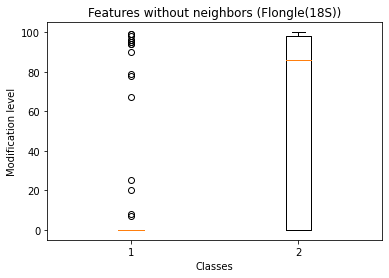

In [39]:
# nanoRMSFIle = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116/nanoRMS/Parental_HCT116_Christiane_Zorbas_all_pass.Filtered.calmd.per.site.baseFreq.csv'
# nanoRMS = pd.read_csv(nanoRMSFIle, sep = ',')
# nanoRMS = nanoRMS[nanoRMS['#Ref']=='NR_003287_RNA28SN5']
# nanoRMS = nanoRMS[nanoRMS['base'] == 'T']
# nanoRMS = nanoRMS[nanoRMS['cov'] >30]
# nanoRMS = nanoRMS[nanoRMS['pos'] >20]
nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/flongle/Parental_HCT116+18S_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'

# nanoRMSPredF = '/prj/Isabel_ONT_rRNA/Sample1_predicted_y_sites_flonge.tsv'
#nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116+28S_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'
nanoRMSPred = pd.read_csv(nanoRMSPredF, sep = '\t')
nanoRMSPred = nanoRMSPred[['Pos']]
nanoRMSPred['Mod']= 'psU'
# positions = pd.read_csv('/prj/Isabel_ONT_rRNA/annotation/all_rrna_mod_status.tsv', sep = ',')
# positions=positions.sort_values(by=["Chr","Position"])
# positions = positions[positions["Chr"]== 'NR_003287_RNA28SN5']
# pos = positions[['Position','ModStatus']]
# pos.loc[pos['ModStatus']!= 'psU','ModStatus'] = 'Unm'
# nano2 = pd.merge(nanoRMS[['pos','base']],nanoRMSPred,left_on='pos',right_on = 'Pos',how='left')
# X_flongle_ = pd.read_pickle("/home/alemsara/DirectRNA/X_f.pkl")

# nano = pd.merge(pos,nano2,left_on='Position',right_on = 'pos')
nano = pd.merge(X_18flongle_[['Pos','Base','ModStatus']],nanoRMSPred,left_on='Pos',right_on = 'Pos',how='left')
nano=nano.drop_duplicates()
ids= nano['Pos']
print(nano[ids.isin(ids[ids.duplicated()])])
nano = nano.replace(np.nan, 'Unm', regex=True)
le = LabelEncoder()
interm = nano.ModStatus
interm[interm!= 'psU']='Unm'
y1 = le.fit_transform(interm)

print(le.classes_)
le = LabelEncoder()
y2 = le.fit_transform(nano.Mod)
print(le.classes_)
nano.loc[(nano['ModStatus'] == 'psU') & (nano['Mod'] == 'Unm')]
print(nano.shape)
eval2(y1,y2)
print(nano[['Pos','ModStatus','Mod']].to_csv('nano2', index=False))


plt.boxplot([X_flongle_['Level'].astype(float)[y2 == 0], X_flongle_['Level'].astype(float)[y2==1]])
plt.xlabel('Classes')
plt.ylabel('Modification level')
plt.title('Features without neighbors (Flongle(18S))')


In [13]:
'/prj/nanopore_direct_rnaseq/20210913_CM_d3/CM_d3_D9_rRNA/20210913_1309_X3_FAQ51279_ef1f204c/CM_d3_D9_rRNA.bam'== '/prj/nanopore_direct_rnaseq/20210913_CM_d3/CM_d3_D9_rRNA/20210913_1309_X3_FAQ51279_ef1f204c/CM_d3_D9_rRNA.bam'

True

In [37]:
# nanoRMSFIle = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116/nanoRMS/Parental_HCT116_Christiane_Zorbas_all_pass.Filtered.calmd.per.site.baseFreq.csv'
# nanoRMS = pd.read_csv(nanoRMSFIle, sep = ',')
# nanoRMS = nanoRMS[nanoRMS['#Ref']=='NR_003287_RNA28SN5']
# nanoRMS = nanoRMS[nanoRMS['base'] == 'T']
# nanoRMS = nanoRMS[nanoRMS['cov'] >30]
# nanoRMS = nanoRMS[nanoRMS['pos'] >20]
nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/flongle/Parental_HCT116+18S_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'

# nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/flongle/Parental_HCT116+28S_F3_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'
#nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116+28S_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'
nanoRMSPred = pd.read_csv(nanoRMSPredF, sep = '\t')
nanoRMSPred = nanoRMSPred[['Pos','ModStatus']]
nanoRMSPred['Mod']= 'psU'
# positions = pd.read_csv('/prj/Isabel_ONT_rRNA/annotation/all_rrna_mod_status.tsv', sep = ',')
# positions=positions.sort_values(by=["Chr","Position"])
# positions = positions[positions["Chr"]== 'NR_003287_RNA28SN5']
# pos = positions[['Position','ModStatus']]
# pos.loc[pos['ModStatus']!= 'psU','ModStatus'] = 'Unm'
# nano2 = pd.merge(nanoRMS[['pos','base']],nanoRMSPred,left_on='pos',right_on = 'Pos',how='left')

# nano = pd.merge(pos,nano2,left_on='Position',right_on = 'pos')
nano = pd.merge(X_18flongle_[['Pos','Base']],nanoRMSPred,left_on='Pos',right_on = 'Pos',how='left')
print(X_28MinION_.shape)
nano=nano.drop_duplicates()
ids= nano['Pos']
print(nano[ids.isin(ids[ids.duplicated()])])
nano = nano.replace(np.nan, 'Unm', regex=True)
le = LabelEncoder()
interm = nano.ModStatus
interm[interm!= 'psU']='Unm'
y1 = le.fit_transform(interm)

print(le.classes_)
le = LabelEncoder()
y2 = le.fit_transform(nano.Mod)
print(le.classes_)
nano.loc[(nano['ModStatus'] == 'psU') & (nano['Mod'] == 'Unm')]
print(nano.shape)
eval('ttt',X_28flongle_['Level'].astype(float),y1,y2,y2)


(282, 31)
Empty DataFrame
Columns: [Pos, Base, ModStatus, Mod]
Index: []
['Unm' 'psU']
['Unm' 'psU']
(395, 4)
ttt
0.9532967032967032
0.9139240506329114
0.47692307692307695
1.0
0.6458333333333334
[[330  34]
 [  0  31]]


IndexError: Boolean index has wrong length: 395 instead of 282

In [24]:
# nanoRMSFIle = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116/nanoRMS/Parental_HCT116_Christiane_Zorbas_all_pass.Filtered.calmd.per.site.baseFreq.csv'
# nanoRMS = pd.read_csv(nanoRMSFIle, sep = ',')
# nanoRMS = nanoRMS[nanoRMS['#Ref']=='NR_003287_RNA28SN5']
# nanoRMS = nanoRMS[nanoRMS['base'] == 'T']
# nanoRMS = nanoRMS[nanoRMS['cov'] >30]
# nanoRMS = nanoRMS[nanoRMS['pos'] >20]
nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116+28S_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'
# nanoRMSPredF = '/prj/Isabel_ONT_rRNA/Sample1_predicted_y_sites_MinION.tsv'
# nanoRMSFIle = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116/nanoRMS/Parental_HCT116_Christiane_Zorbas_all_pass.Filtered.calmd.per.site.baseFreq.csv'
# nanoRMS = pd.read_csv(nanoRMSFIle, sep = ',')
# nanoRMS = nanoRMS[nanoRMS['#Ref']=='NR_003287_RNA28SN5']
# nanoRMS = nanoRMS[nanoRMS['base'] == 'T']
# nanoRMS = nanoRMS[nanoRMS['cov'] >30]
# nanoRMS = nanoRMS[nanoRMS['pos'] >20]

#nanoRMSPredF = '/prj/Isabel_ONT_rRNA/HumanResults/Parental_HCT116+28S_IVT/Paired_comparison_altering_sites_pU_predictions.tsv'
nanoRMSPred = pd.read_csv(nanoRMSPredF, sep = '\t')
nanoRMSPred = nanoRMSPred[['Pos']]
nanoRMSPred['Mod']= 'psU'
# positions = pd.read_csv('/prj/Isabel_ONT_rRNA/annotation/all_rrna_mod_status.tsv', sep = ',')
# positions=positions.sort_values(by=["Chr","Position"])
# positions = positions[positions["Chr"]== 'NR_003287_RNA28SN5']
# pos = positions[['Position','ModStatus']]
# pos.loc[pos['ModStatus']!= 'psU','ModStatus'] = 'Unm'
# nano2 = pd.merge(nanoRMS[['pos','base']],nanoRMSPred,left_on='pos',right_on = 'Pos',how='left')
# X_flongle_ = pd.read_pickle("/home/alemsara/DirectRNA/X_f.pkl")

# nano = pd.merge(pos,nano2,left_on='Position',right_on = 'pos')
nano = pd.merge(X_28MinION_[['Pos','Base','ModStatus']],nanoRMSPred,left_on='Pos',right_on = 'Pos',how='left')
nano=nano.drop_duplicates()
ids= nano['Pos']
print(nano[ids.isin(ids[ids.duplicated()])])
nano = nano.replace(np.nan, 'Unm', regex=True)
le = LabelEncoder()
interm = nano.ModStatus
interm[interm!= 'psU']='Unm'
y1 = le.fit_transform(interm)

print(le.classes_)
le = LabelEncoder()
y2 = le.fit_transform(nano.Mod)
print(le.classes_)
nano.loc[(nano['ModStatus'] == 'psU') & (nano['Mod'] == 'Unm')]
print(nano.shape)
eval2(y1,y2)
print(nano[['Pos','ModStatus','Mod']].to_csv('nano2', index=False))


plt.boxplot([X_flongle_['Level'].astype(float)[y2 == 0], X_flongle_['Level'].astype(float)[y2==1]])
plt.xlabel('Classes')
plt.ylabel('Modification level')
plt.title('Features without neighbors (Flongle(18S))')


Empty DataFrame
Columns: [Pos, Base, ModStatus, Mod]
Index: []
['Unm' 'psU']
['Unm' 'psU']
(282, 4)
0.875886524822695
0.5892857142857143
0.7333333333333333
0.6534653465346534
[[214  23]
 [ 12  33]]
0.5840972914315482
None


IndexError: Boolean index has wrong length: 282 instead of 395